# PA 2: Classification - Nearest Neighbors

## Student Details (1 Point)

* Student Name and ID: <b>Bhogal, Gurvir Singh Tarlok Singh, UTA ID: 1001769871</b> <-- Only this student will submit the assignment

* Student Name and ID: <b>Rohith Rajagopalan Ramesh Babu, UTA ID: 1001518031</b>

* Notes: When submitting, fill your name and ID in this cell. [1 point]
* Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions ( 2 Points)
* Step 3: Rename this submission file as 'yourLastName_Last4digitsofyourID_NN.ipynb' [1 point]
* Step 4: Place this file inside the folder 'PA#2_Classification_yourLastName' [1 point]
* Programming Assignment Details (25 Points)
* 
* For this assignment use Jupyter notebook, Panda, and scikit.
* 1) Load wine dataset from sklearn datasets. [1 points]
* 2) Split your dataset 70% for training, and 30% for testing the classifier. [2 points]
* 3) Select only 2 attributes for training and testing your model. [2 points]
* 4) Use Euclidean distance. [3 points]
* 5) Test the classifier with three diferent numbers for neighbors and record the results. [3 points]
* 6) Use comments to explain your code and variable names.[2 points]
* 7) Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and
* support) for all three different numbers.[6 points]
* 8) Plot the classifier in a 2D projection for all three different numbers.[6 points]

In [18]:
# Importing all required libraries

import pandas as pd

import numpy as nd

from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [19]:
# Loading the wine dataaset 
# References:link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

dataset = datasets.load_wine()

In [20]:
# Checking Shape of Required Data Values and Target values 

print(dataset['data'].shape," ",dataset['target'].shape)

(178, 13)   (178,)


In [21]:
features = pd.DataFrame(data=dataset['data'],columns=dataset['feature_names'])
data = features
data['target']=dataset['target']


In [22]:
new_data = data[["alcohol","proline","target"]]

In [23]:
new_data

,alcohol,proline,target
0,14.23,1065.0,0
1,13.20,1050.0,0
2,13.16,1185.0,0
3,14.37,1480.0,0
4,13.24,735.0,0
...,...,...,...
173,13.71,740.0,2
174,13.40,750.0,2
175,13.27,835.0,2
176,13.17,840.0,2


In [40]:
# Splitting dataset into Train And Test Set - using 70% for Training Data and 30% for Test Data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(new_data[["alcohol","proline"]],
                                                    new_data["target"],test_size=0.3)

In [41]:
# Displaying First 5 Records for Train Data for selected attributes 

x_train.head()

,alcohol,proline
102,12.34,438.0
90,12.08,480.0
177,14.13,560.0
146,13.88,415.0
63,12.37,420.0


In [42]:
# Displaying First 5 Records for Train Data for Target Values 

y_train.head()

102    1
90     1
177    2
146    2
63     1
Name: target, dtype: int64

In [43]:
# Displaying First 5 Records for Test Data for Selected Attributes Values

x_test.head()

,alcohol,proline
106,12.25,510.0
103,11.82,415.0
70,12.29,870.0
107,12.72,488.0
82,12.08,630.0


In [44]:
# First 5 Records for Test Data for Target Values

y_test.head()

106    1
103    1
70     1
107    1
82     1
Name: target, dtype: int64

In [45]:
# Storing accuracies for knn models for k = 1,4,7

accuracies = []

In [46]:
# For k = 1
# References: link:https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

model_1 = KNeighborsClassifier(n_neighbors=1,metric = "euclidean")
model_1.fit(x_train,y_train)
y_pred_1 = model_1.predict(x_test)

print("Accuracy of Knn model for k = 1 :",accuracy_score(y_test, y_pred_1)*100)
print("Confusion Matrix = \n",confusion_matrix(y_test, y_pred_1))
print("\n Classification Report = \n",classification_report(y_test, y_pred_1))

accuracies.append(accuracy_score(y_test, y_pred_1)*100)



Accuracy of Knn model for k = 1 : 68.51851851851852
Confusion Matrix = 
 [[16  0  5]
 [ 0 13  8]
 [ 1  3  8]]

 Classification Report = 
               precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.81      0.62      0.70        21
           2       0.38      0.67      0.48        12

    accuracy                           0.69        54
   macro avg       0.71      0.68      0.68        54
weighted avg       0.77      0.69      0.71        54



In [47]:
# For k = 4
model_2 = KNeighborsClassifier(n_neighbors=4,metric = "euclidean")
model_2.fit(x_train,y_train)
y_pred_2 = model_2.predict(x_test)
print("Accuracy of Knn model for k = 4 :",accuracy_score(y_test, y_pred_2)*100)
print("Confusion Matrix = \n",confusion_matrix(y_test, y_pred_2))
print("\n Classification Report = \n",classification_report(y_test, y_pred_2))

accuracies.append(accuracy_score(y_test, y_pred_2)*100)

Accuracy of Knn model for k = 4 : 70.37037037037037
Confusion Matrix = 
 [[19  0  2]
 [ 1 18  2]
 [ 1 10  1]]

 Classification Report = 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.64      0.86      0.73        21
           2       0.20      0.08      0.12        12

    accuracy                           0.70        54
   macro avg       0.58      0.62      0.59        54
weighted avg       0.65      0.70      0.66        54



In [48]:
# For k = 7
model_3 = KNeighborsClassifier(n_neighbors=7,metric = "euclidean")
model_3.fit(x_train,y_train)
y_pred_3 = model_3.predict(x_test)
print("Accuracy of Knn model for k = 7 :",accuracy_score(y_test, y_pred_3)*100)
print("Confusion Matrix = \n",confusion_matrix(y_test, y_pred_3))
print("\n Classification Report = \n",classification_report(y_test, y_pred_3))

accuracies.append(accuracy_score(y_test, y_pred_3)*100)

Accuracy of Knn model for k = 7 : 66.66666666666666
Confusion Matrix = 
 [[16  0  5]
 [ 1 15  5]
 [ 0  7  5]]

 Classification Report = 
               precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.68      0.71      0.70        21
           2       0.33      0.42      0.37        12

    accuracy                           0.67        54
   macro avg       0.65      0.63      0.64        54
weighted avg       0.71      0.67      0.68        54



In [49]:
accuracies

[68.51851851851852, 70.37037037037037, 66.66666666666666]

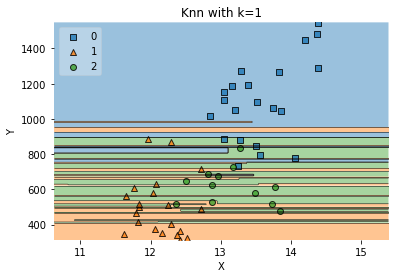

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

# Plotting decision region
plot_decision_regions(x_test.to_numpy(), y_test.to_numpy(), clf=model_1, legend=2)
# Adding axes annotations
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Knn with k=1")
plt.show()

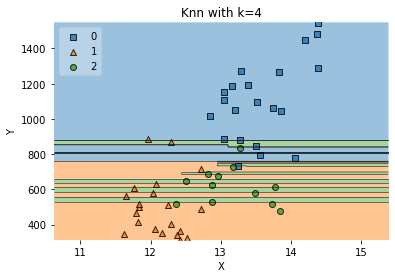

In [51]:
# Plotting decision region
plot_decision_regions(x_test.to_numpy(), y_test.to_numpy(), clf=model_2, legend=2)
# Adding axes annotations
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Knn with k=4")
plt.show()

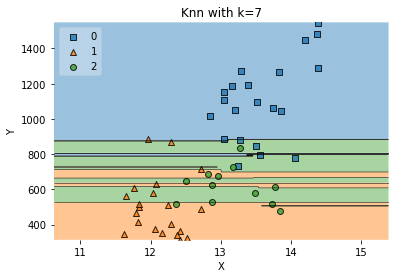

In [52]:
# Plotting decision region
plot_decision_regions(x_test.to_numpy(), y_test.to_numpy(), clf=model_3, legend=2)
# Adding axes annotations
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Knn with k=7")
plt.show()

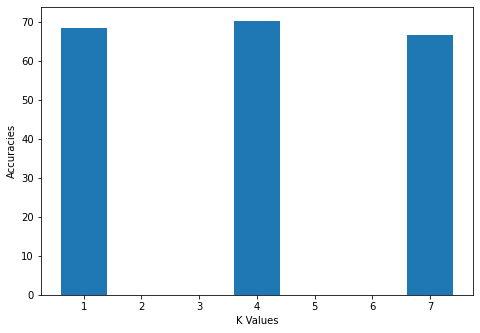

In [53]:
import matplotlib.pyplot as plt

# References: https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.figure.html

x=[1,4,7]
fig = plt.figure()
bar_graph = fig.add_axes([0,0,1,1])
bar_graph.set_ylabel('Accuracies')
bar_graph.set_xlabel('K Values')

bar_graph.bar(x,accuracies)
plt.show()


# REFERENCES

* https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.figure.html
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
